In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from forecast_combine.reconcile import ForecastReconciler


In [2]:
# trained models for each autonomous factor
output_folder = '../model_output/'
model_names = ['CIC', 'NFA', 'SAB', 'Total_AF']
forecasters_d = {}
for model_name in model_names:
    with open(output_folder + model_name + '_forecast.pkl', 'rb') as f:
        forecasters_d[model_name] = pickle.load(f)    

In [3]:
# Hierarchical relationship matrix
S = pd.DataFrame(np.array([[1,1,-1], [1,0,0], [0,1,0], [0,0,1]]), 
                 columns=['CIC', 'SAB', 'NFA'], 
                 index=['Total_AF', 'CIC', 'SAB', 'NFA'])

In [4]:
# Hiearchical reconciliation model
reconciler = ForecastReconciler(forecasters_d=forecasters_d, S = S)

LOESS does not support prediction intervals
Error: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.
Computing the historical values for all forecasters ...


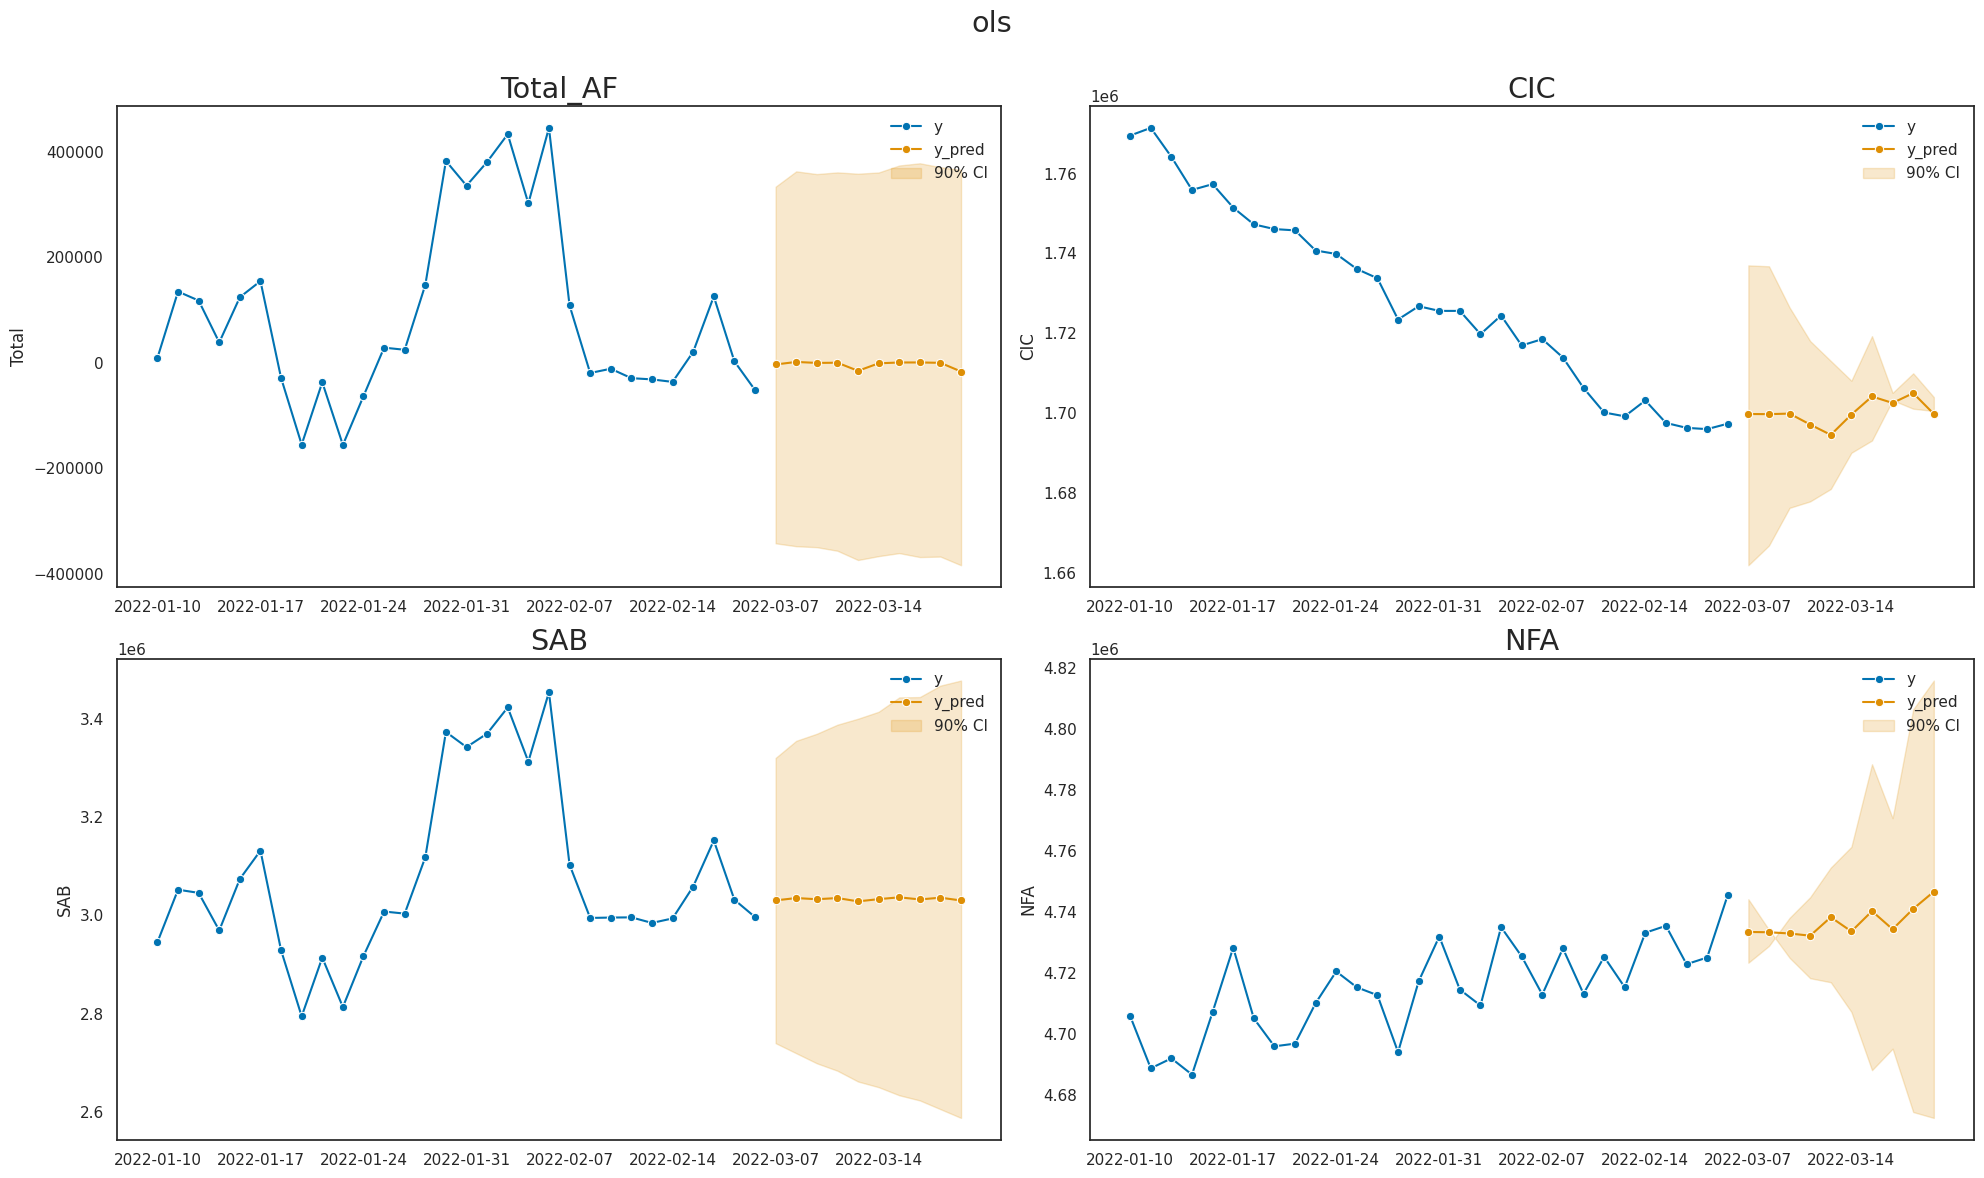

LOESS does not support prediction intervals
Error: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.
wls reconciliation method requires the forecasters prediction errors variance-covariance matrix ...
Computing the prediction errors for all forecasters ...
Computing prediction errors for CIC ...
Computing prediction errors for NFA ...
Computing prediction errors for SAB ...
Computing prediction errors for Total_AF ...


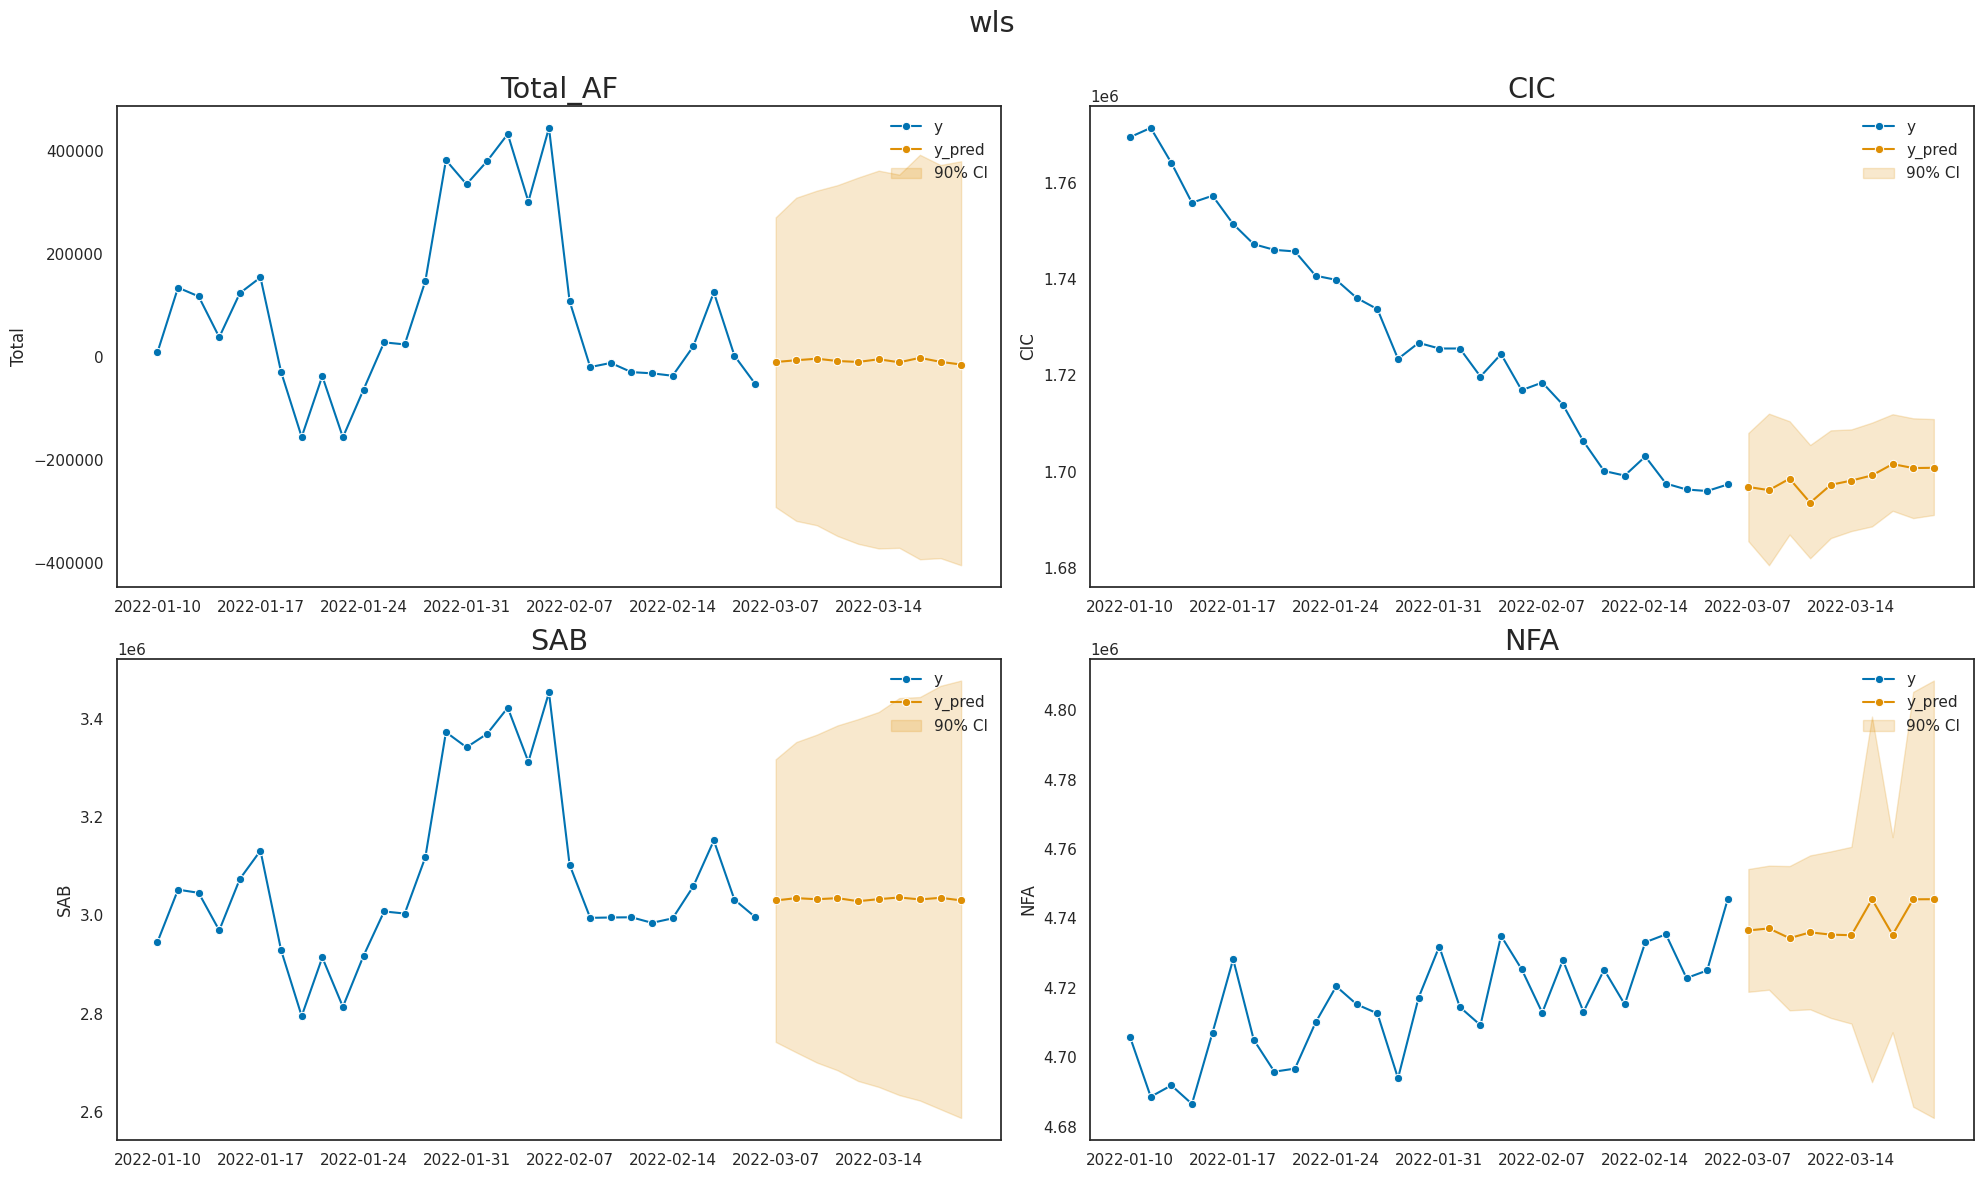

LOESS does not support prediction intervals
Error: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.
mint reconciliation method requires the forecasters prediction errors variance-covariance matrix ...


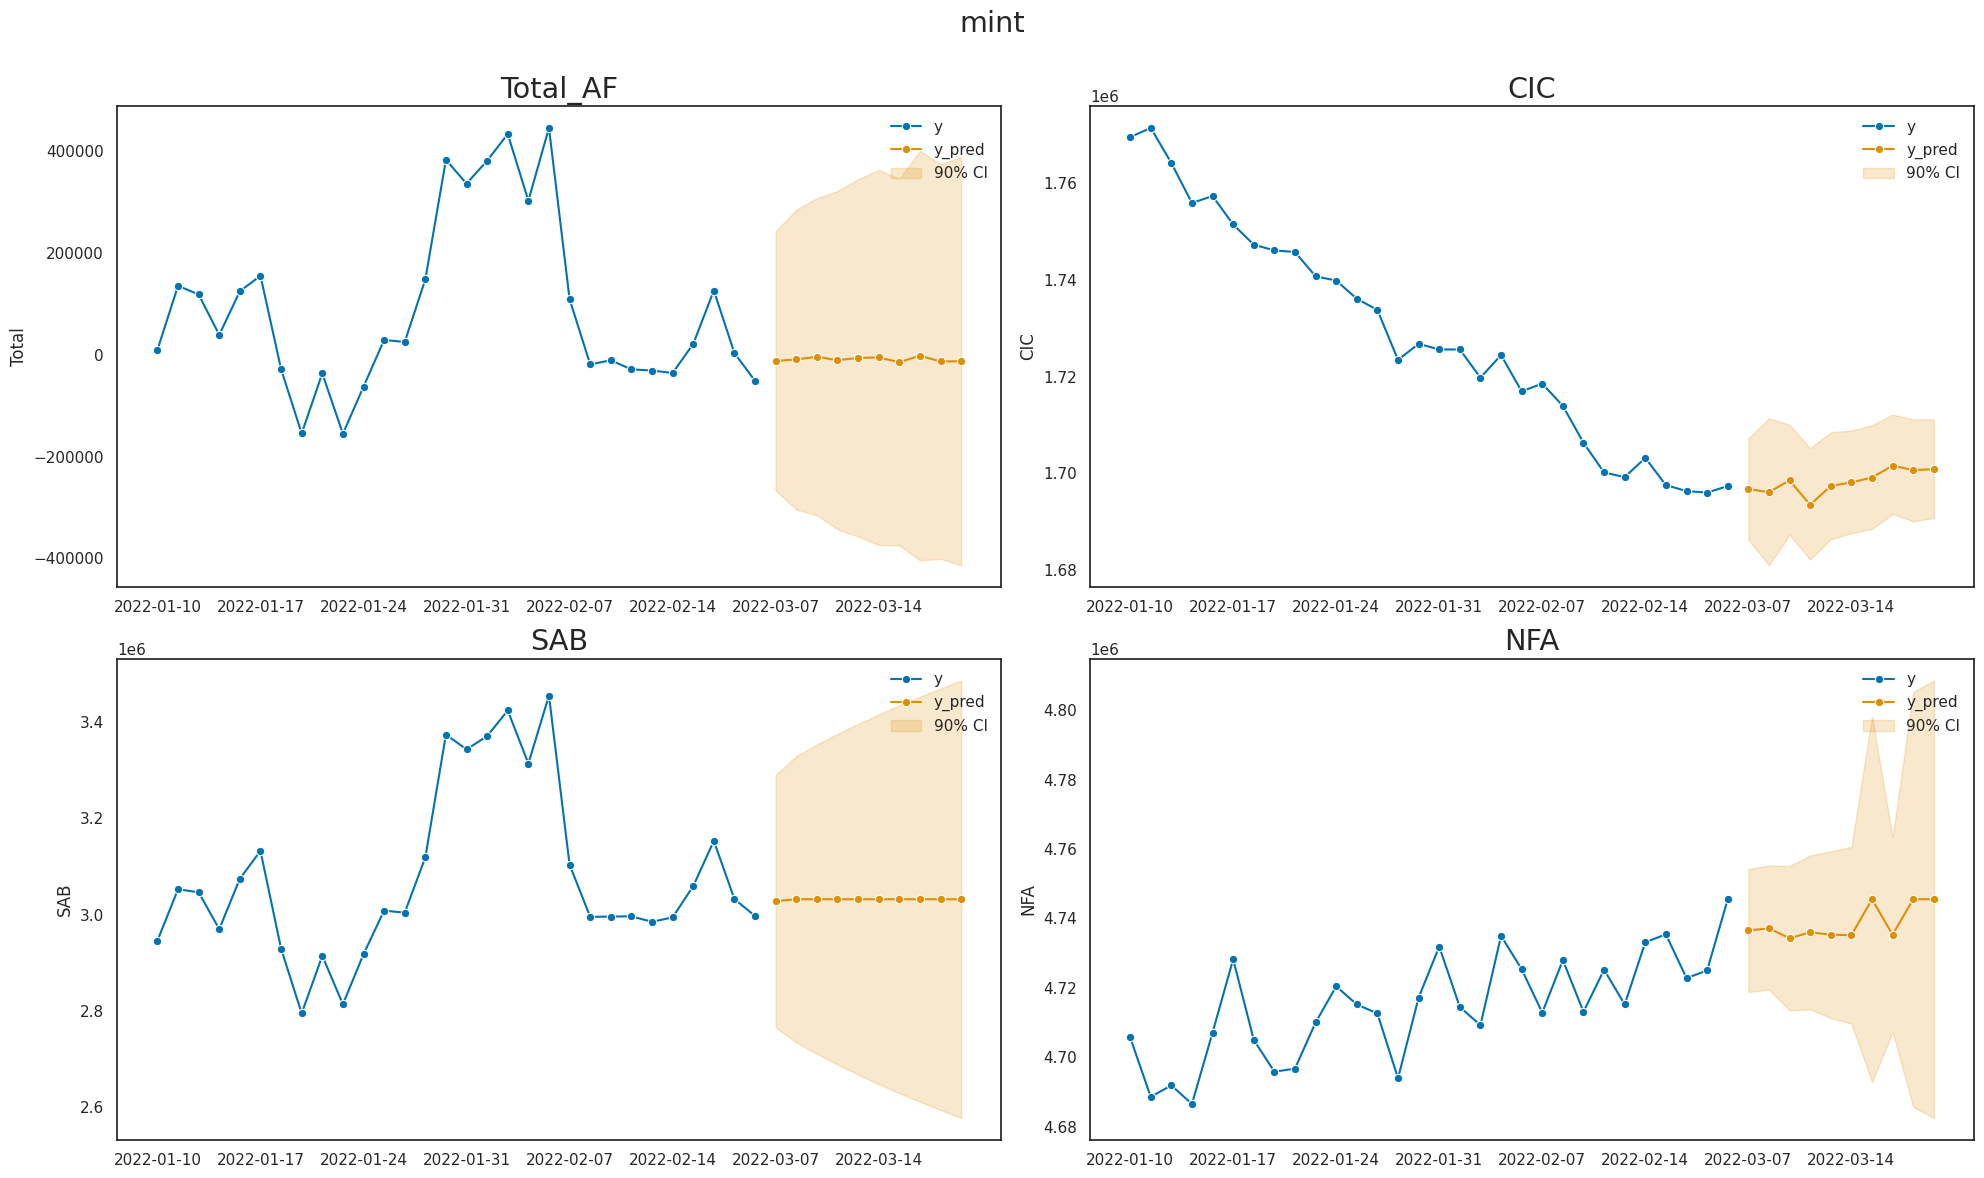

LOESS does not support prediction intervals
Error: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.


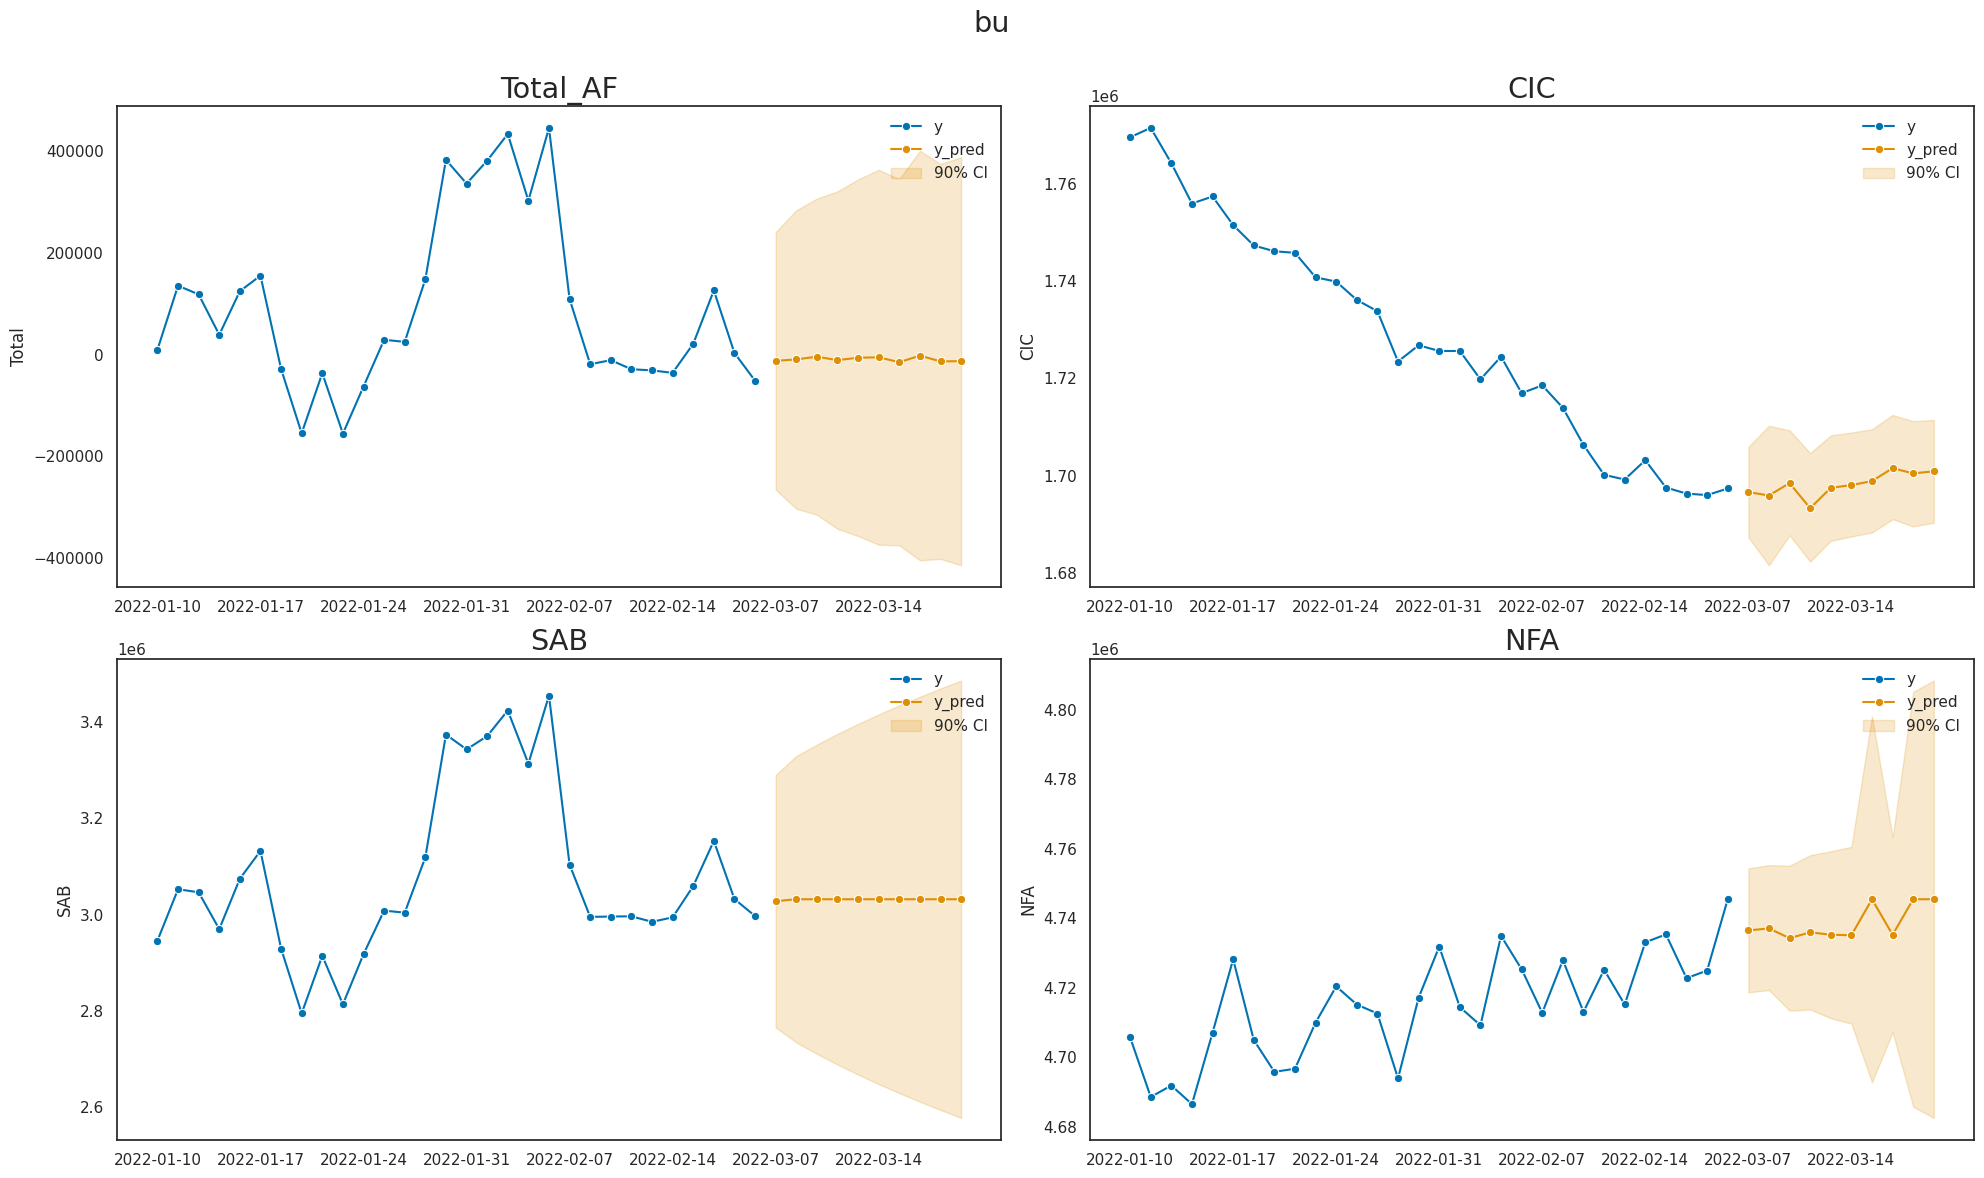

LOESS does not support prediction intervals
Error: StatsForecastMSTL does not have the capability to return prediction intervals. If you think this estimator should have the capability, please open an issue on sktime.


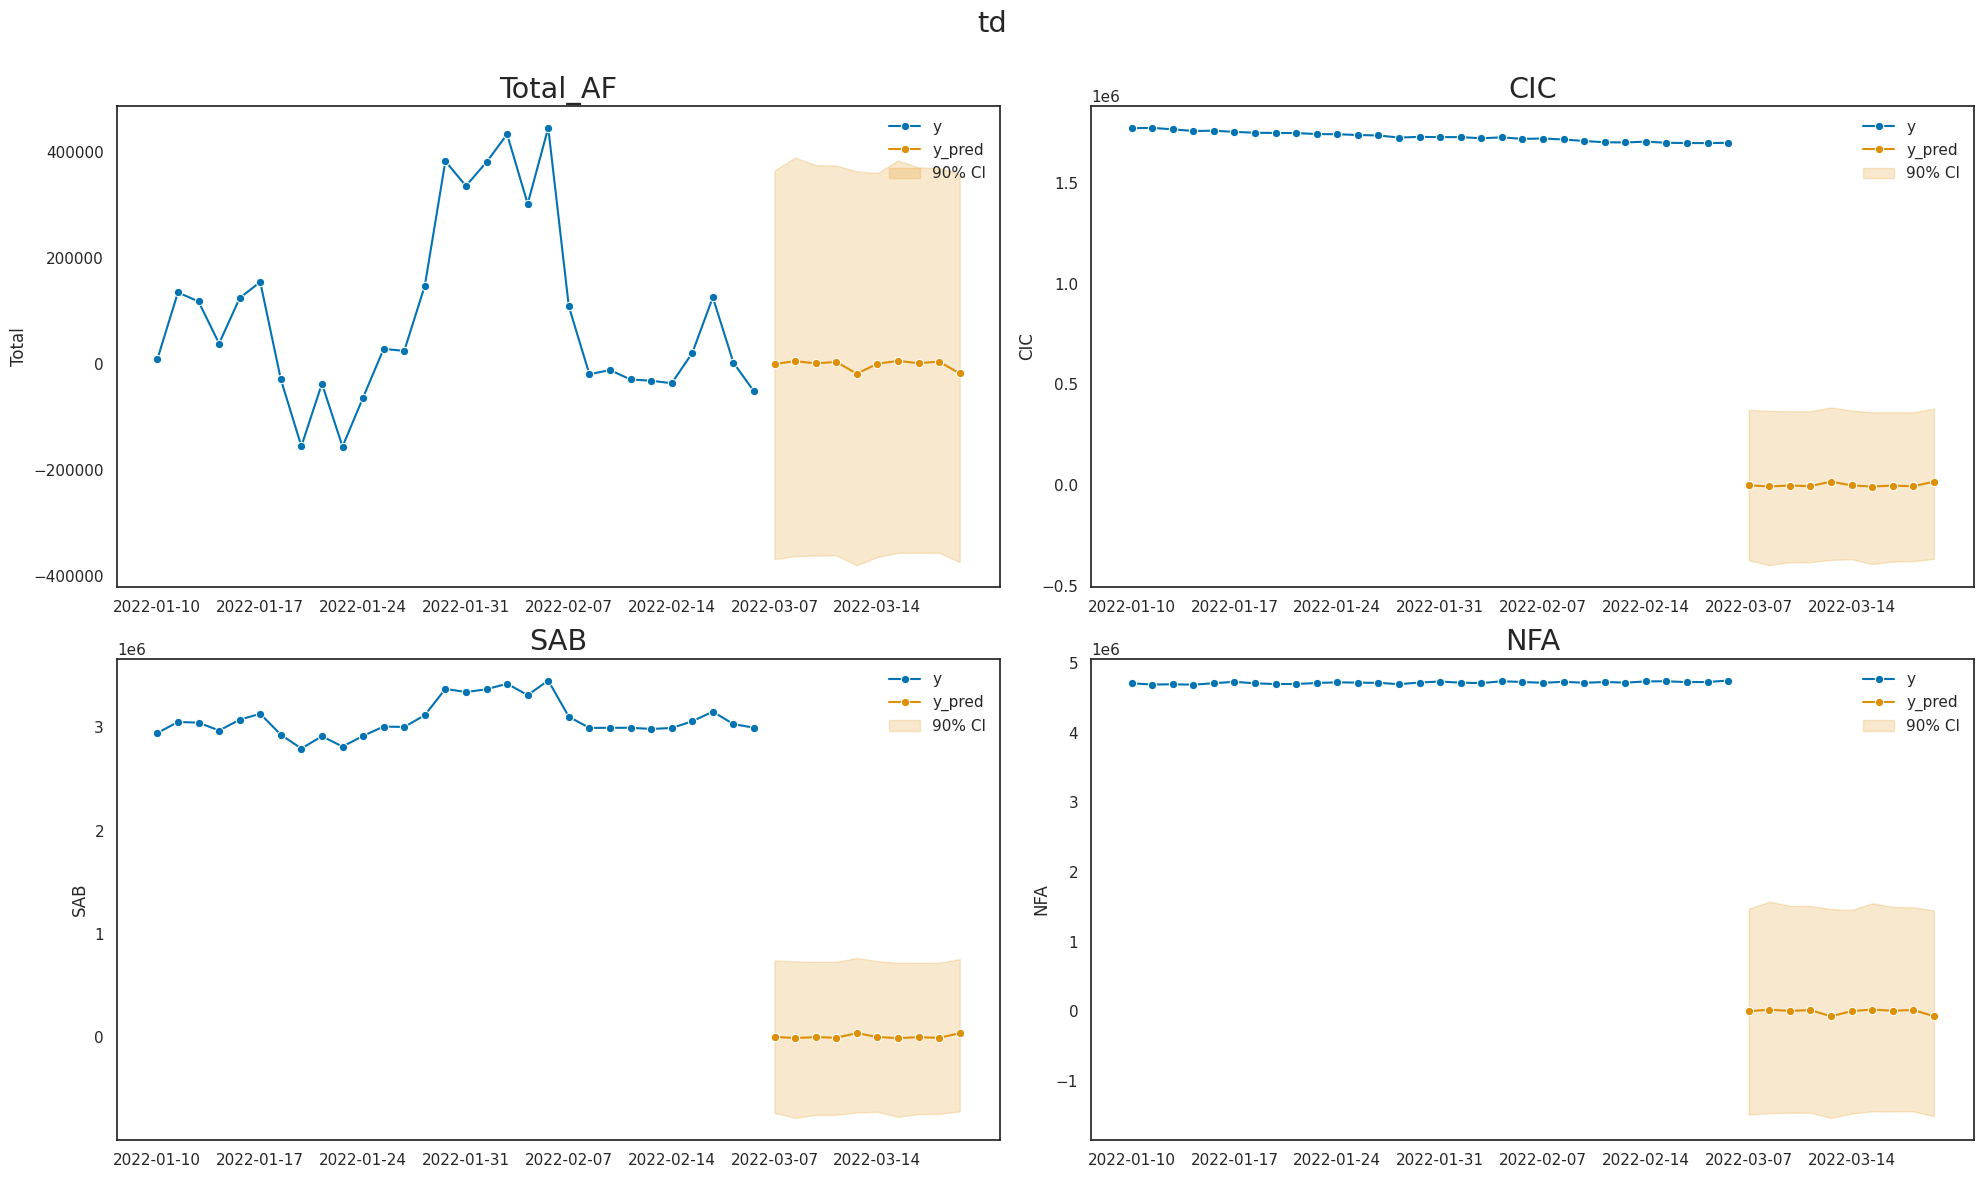

In [5]:
for m in ['ols', 'wls', 'mint', 'bu', 'td']:
    reconciled_preds, reconciled_intervals = reconciler.predict(reconciliation_method = m)
    reconciler.plot_predict(reconciled_preds, reconciled_intervals, title = m)
    plt.show()